<a href="https://colab.research.google.com/github/herbguy/LearnByDSProject/blob/main/04_week_mission_booster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_rank = pd.read_csv('sample_submission.csv')
print(df_train.shape)
print(df_test.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 중 '나눔고딕'을 찾아서 그 경로를 가져옵니다.
font_path = fm.findfont(fm.FontProperties(family='AppleGothic'))

# 가져온 경로를 matplotlib의 폰트로 설정합니다.
plt.rcParams['font.family'] = 'AppleGothic'

# 필요한 경우, 폰트 사이즈도 변경할 수 있습니다.
plt.rcParams['font.size'] = 12

In [ ]:
df_train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [ ]:
print('대출기간: ', df_train['대출기간'].unique())
print('근로기간: ', df_train['근로기간'].unique())
print('주택소유상태: ', df_train['주택소유상태'].unique())
print('대출목적: ', df_train['대출목적'].unique())

대출기간:  [' 36 months' ' 60 months']
근로기간:  ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태:  ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적:  ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']


In [ ]:
df_train = df_train[df_train['근로기간']!='Unknown']
df_test = df_test[df_test['근로기간']!='Unknown']
print('근로기간: ', df_train['근로기간'].unique())

근로기간:  ['6 years' '10+ years' '5 years' '8 years' '9 years' '2 years' '1 year'
 '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year' '3'
 '1 years']


In [ ]:
df_train["근로기간"] = df_train["근로기간"].replace("6 years", 6)
df_train["근로기간"] = df_train["근로기간"].replace("10+ years", 10)
df_train["근로기간"] = df_train["근로기간"].replace("5 years", 5)
df_train["근로기간"] = df_train["근로기간"].replace("8 years", 8)
df_train["근로기간"] = df_train["근로기간"].replace("9 years", 9)
df_train["근로기간"] = df_train["근로기간"].replace("2 years", 2)
df_train["근로기간"] = df_train["근로기간"].replace("1 year", 1)
df_train["근로기간"] = df_train["근로기간"].replace("3 years", 3)
df_train["근로기간"] = df_train["근로기간"].replace("7 years", 7)
df_train["근로기간"] = df_train["근로기간"].replace("4 years", 4)
df_train["근로기간"] = df_train["근로기간"].replace("10+years", 10)
df_train["근로기간"] = df_train["근로기간"].replace("<1 year", 1)
df_train["근로기간"] = df_train["근로기간"].replace("1 years", 1)
df_train["근로기간"] = df_train["근로기간"].replace("< 1 year", 1)
df_train["근로기간"] = df_train["근로기간"].replace("3", 3)

df_train["대출기간"] = df_train["대출기간"].replace(" 36 months", 36)
df_train["대출기간"] = df_train["대출기간"].replace(" 60 months", 60)

df_test["근로기간"] = df_test["근로기간"].replace("6 years", 6)
df_test["근로기간"] = df_test["근로기간"].replace("10+ years", 10)
df_test["근로기간"] = df_test["근로기간"].replace("5 years", 5)
df_test["근로기간"] = df_test["근로기간"].replace("8 years", 8)
df_test["근로기간"] = df_test["근로기간"].replace("9 years", 9)
df_test["근로기간"] = df_test["근로기간"].replace("2 years", 2)
df_test["근로기간"] = df_test["근로기간"].replace("1 year", 1)
df_test["근로기간"] = df_test["근로기간"].replace("3 years", 3)
df_test["근로기간"] = df_test["근로기간"].replace("7 years", 7)
df_test["근로기간"] = df_test["근로기간"].replace("4 years", 4)
df_test["근로기간"] = df_test["근로기간"].replace("10+years", 10)
df_test["근로기간"] = df_test["근로기간"].replace("<1 year", 1)
df_test["근로기간"] = df_test["근로기간"].replace("1 years", 1)
df_test["근로기간"] = df_test["근로기간"].replace("< 1 year", 1)
df_test["근로기간"] = df_test["근로기간"].replace("3", 3)

df_test["대출기간"] = df_test["대출기간"].replace(" 36 months", 36)
df_test["대출기간"] = df_test["대출기간"].replace(" 60 months", 60)

In [ ]:
print(len(df_test))

60335


In [ ]:
df_train.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
5,TRAIN_00005,4800000,36,10,RENT,84000000,13.78,30,휴가,0,240216,55428.0,0.0,0.0,A


In [ ]:
df_null = df_train.isnull() # True/False 값으로 결측치 확인
df_null.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_null.sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [ ]:
df_train.describe()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.062300e+04,90623.000000,90623.000000,9.062300e+04,90623.000000,90623.000000,90623.000000,9.062300e+04,9.062300e+04,90623.000000,90623.000000
mean,1.856741e+07,44.115291,6.097657,9.602653e+07,19.170749,25.392119,0.349735,8.326541e+05,4.350714e+05,53.536078,0.005915
std,1.035141e+07,11.353874,3.592182,1.018085e+08,8.669904,12.109055,0.925710,1.042277e+06,4.441825e+05,1396.603298,0.080745
min,1.200000e+06,36.000000,1.000000,6.432000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.080000e+07,36.000000,2.000000,5.880000e+07,12.600000,17.000000,0.000000,3.126360e+05,1.378380e+05,0.000000,0.000000
50%,1.728000e+07,36.000000,6.000000,8.160000e+07,18.630000,24.000000,0.000000,6.047280e+05,2.934120e+05,0.000000,0.000000
75%,2.448000e+07,60.000000,10.000000,1.140000e+08,25.410000,32.000000,0.000000,1.067496e+06,5.794080e+05,0.000000,0.000000
max,4.200000e+07,60.000000,10.000000,1.080000e+10,100.090000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [ ]:
feature_columns = df_train.columns[:-1].tolist()

In [ ]:
df_train['대출등급'].value_counts()

대출등급
B    27075
C    25995
A    15838
D    12482
E     6976
F     1862
G      395
Name: count, dtype: int64

In [ ]:
df_train['대출등급'].value_counts(normalize=True) * 100

대출등급
B    29.876521
C    28.684771
A    17.476799
D    13.773545
E     7.697825
F     2.054666
G     0.435872
Name: proportion, dtype: float64

<AxesSubplot:xlabel='대출등급', ylabel='count'>

/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

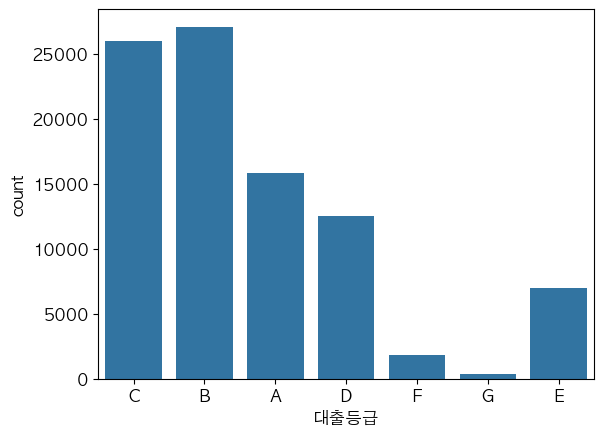

In [ ]:
sns.countplot(data=df_train, x='대출등급')

In [ ]:
df_train.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [ ]:
df_test.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'],
      dtype='object')

In [ ]:
X_train = df_train[['대출금액', '대출기간', '근로기간','연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']]
y_train = df_train['대출등급']

X_test = df_test[['대출금액', '대출기간', '근로기간','연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']]
y_test = df_rank['대출등급']

print(len(df_train))
print(len(df_test))

90623
60335


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [ ]:
y_predict = model.fit(X_train, y_train).predict(X_test)


array(['B', 'B', 'A', 'C', 'C'], dtype=object)

In [ ]:
# y_test와 y_predict를 데이터프레임으로 변환
df_predict = pd.DataFrame({'ID': df_test['ID'], '대출등급': y_predict})

# df_predict를 y_rank에 병합
df_rank = pd.merge(df_rank, df_predict, on='ID', how='left')

In [ ]:
df_rank

,ID,대출등급_x,대출등급_y
0,TEST_00000,G,B
1,TEST_00001,G,B
2,TEST_00002,G,A
3,TEST_00003,G,C
4,TEST_00004,G,C
...,...,...,...
64192,TEST_64192,G,C
64193,TEST_64193,G,D
64194,TEST_64194,G,D
64195,TEST_64195,G,C
